In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | puerto ayora
Processing Record 2 of Set 13 | beira
Processing Record 3 of Set 13 | samusu
City not found. Skipping...
Processing Record 4 of Set 13 | rikitea
Processing Record 5 of Set 13 | victoria
Processing Record 6 of Set 13 | kapaa
Processing Record 7 of Set 13 | kariba
Processing Record 8 of Set 13 | bukama
Processing Record 9 of Set 13 | cherskiy
Processing Record 10 of Set 13 | ixtapa
Processing Record 11 of Set 13 | albany
Processing Record 12 of Set 13 | luderitz
Processing Record 13 of Set 13 | bambous virieux
Processing Record 14 of Set 13 | guerrero negro
Processing Record 15 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 13 | bajil
Processing Record 17 of Set 13 | cape town
Processing Record 18 of Set 13 | hobart
Processing Record 19 of Set 13 | vaini
Processing Record 20 of Set 13 | ribeira grande
Processing Record 21 of Set 13 | mataura
Processing Record 22 of Set 13 | san patricio
Processing Record 2

Processing Record 36 of Set 16 | ferentino
Processing Record 37 of Set 16 | male
Processing Record 38 of Set 16 | abancay
Processing Record 39 of Set 16 | phalaborwa
Processing Record 40 of Set 16 | bilma
Processing Record 41 of Set 16 | riviere-du-loup
Processing Record 42 of Set 16 | ovalle
Processing Record 43 of Set 16 | tumannyy
City not found. Skipping...
Processing Record 44 of Set 16 | necochea
Processing Record 45 of Set 16 | norman wells
Processing Record 46 of Set 16 | avera
Processing Record 47 of Set 16 | paita
Processing Record 48 of Set 16 | shieli
Processing Record 49 of Set 16 | mangan
Processing Record 50 of Set 16 | tecoanapa
Processing Record 1 of Set 17 | arrecife
Processing Record 2 of Set 17 | kruisfontein
Processing Record 3 of Set 17 | santiago del estero
Processing Record 4 of Set 17 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 17 | hambantota
Processing Record 6 of Set 17 | dakar
Processing Record 7 of Set 17 | taoudenni
Pro

Processing Record 20 of Set 20 | amurzet
Processing Record 21 of Set 20 | kuchera
Processing Record 22 of Set 20 | mahibadhoo
Processing Record 23 of Set 20 | nelson bay
Processing Record 24 of Set 20 | qeshm
Processing Record 25 of Set 20 | namatanai
Processing Record 26 of Set 20 | santa isabel do rio negro
Processing Record 27 of Set 20 | kosa
Processing Record 28 of Set 20 | mwinilunga
Processing Record 29 of Set 20 | dunn
Processing Record 30 of Set 20 | lagoa
Processing Record 31 of Set 20 | marsabit
Processing Record 32 of Set 20 | faanui
Processing Record 33 of Set 20 | bur gabo
City not found. Skipping...
Processing Record 34 of Set 20 | bairiki
Processing Record 35 of Set 20 | warrington
Processing Record 36 of Set 20 | artesia
Processing Record 37 of Set 20 | yarada
Processing Record 38 of Set 20 | coihaique
Processing Record 39 of Set 20 | auki
Processing Record 40 of Set 20 | gat
Processing Record 41 of Set 20 | barentu
Processing Record 42 of Set 20 | havoysund
Processing

Processing Record 7 of Set 24 | samalaeulu
City not found. Skipping...
Processing Record 8 of Set 24 | burla
Processing Record 9 of Set 24 | harnai
Processing Record 10 of Set 24 | grand gaube
Processing Record 11 of Set 24 | louisbourg
City not found. Skipping...
Processing Record 12 of Set 24 | kargasok
Processing Record 13 of Set 24 | rawannawi
City not found. Skipping...
Processing Record 14 of Set 24 | krasnogorsk
Processing Record 15 of Set 24 | gigmoto
Processing Record 16 of Set 24 | yenagoa
Processing Record 17 of Set 24 | chara
Processing Record 18 of Set 24 | satitoa
City not found. Skipping...
Processing Record 19 of Set 24 | bethal
Processing Record 20 of Set 24 | fallon
Processing Record 21 of Set 24 | areosa
Processing Record 22 of Set 24 | micomeseng
Processing Record 23 of Set 24 | attawapiskat
City not found. Skipping...
Processing Record 24 of Set 24 | vestmannaeyjar
Processing Record 25 of Set 24 | arlit
Processing Record 26 of Set 24 | eyl
Processing Record 27 of S

In [9]:
len(city_data)

559

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,68.56,90,41,7.00,EC,2021-09-22 03:35:59
1,Beira,-19.8436,34.8389,69.89,94,90,8.05,MZ,2021-09-22 03:36:00
2,Rikitea,-23.1203,-134.9692,73.90,72,1,14.72,PF,2021-09-22 03:36:01
3,Victoria,22.2855,114.1577,93.96,69,45,1.01,HK,2021-09-22 03:33:33
4,Kapaa,22.0752,-159.3190,84.18,72,40,4.00,US,2021-09-22 03:36:01
5,Kariba,-16.5167,28.8000,66.29,31,3,3.60,ZW,2021-09-22 03:36:02
6,Bukama,-9.2000,25.8500,70.68,27,42,2.80,CD,2021-09-22 03:36:02
7,Cherskiy,68.7500,161.3000,36.25,42,100,8.63,RU,2021-09-22 03:36:03
8,Ixtapa,20.7000,-105.2000,83.23,84,99,2.62,MX,2021-09-22 03:36:03
9,Albany,42.6001,-73.9662,65.32,89,100,5.08,US,2021-09-22 03:33:15


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2021-09-22 03:35:59,-0.7393,-90.3518,68.56,90,41,7.00
1,Beira,MZ,2021-09-22 03:36:00,-19.8436,34.8389,69.89,94,90,8.05
2,Rikitea,PF,2021-09-22 03:36:01,-23.1203,-134.9692,73.90,72,1,14.72
3,Victoria,HK,2021-09-22 03:33:33,22.2855,114.1577,93.96,69,45,1.01
4,Kapaa,US,2021-09-22 03:36:01,22.0752,-159.3190,84.18,72,40,4.00


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

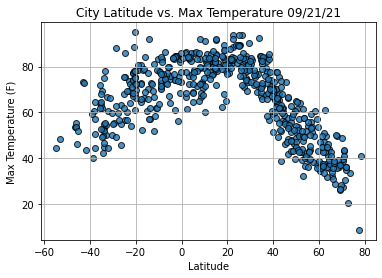

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

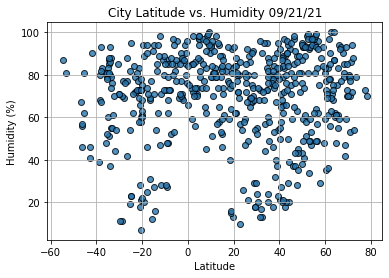

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

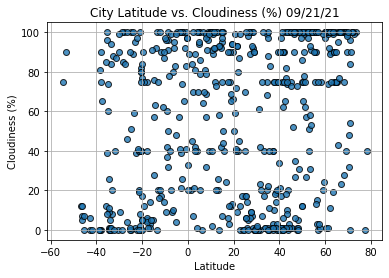

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

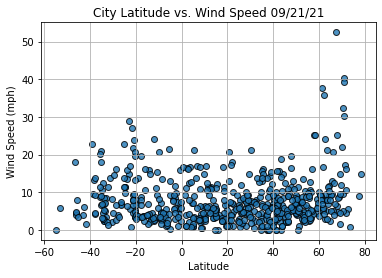

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Victoria,HK,2021-09-22 03:33:33,22.2855,114.1577,93.96,69,45,1.01
4,Kapaa,US,2021-09-22 03:36:01,22.0752,-159.3190,84.18,72,40,4.00
7,Cherskiy,RU,2021-09-22 03:36:03,68.7500,161.3000,36.25,42,100,8.63
8,Ixtapa,MX,2021-09-22 03:36:03,20.7000,-105.2000,83.23,84,99,2.62
9,Albany,US,2021-09-22 03:33:15,42.6001,-73.9662,65.32,89,100,5.08


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

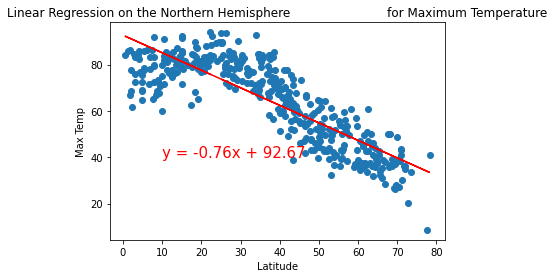

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

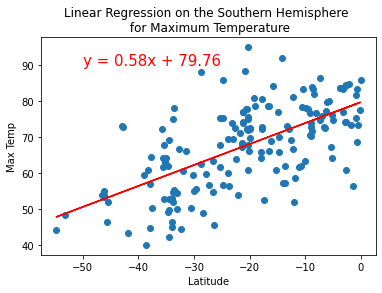

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))

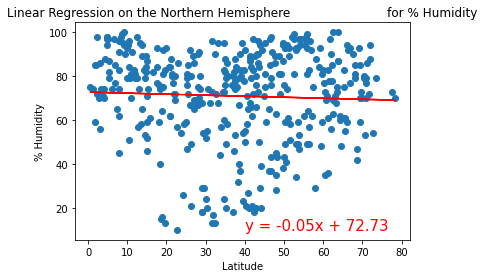

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

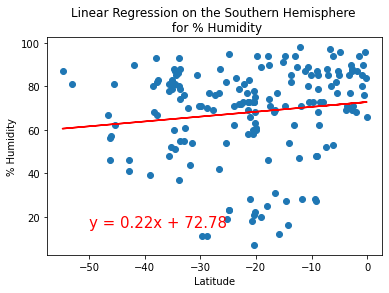

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-50,15))

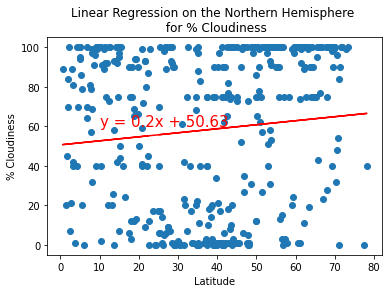

In [25]:
# 6.4.4 Skill Drill
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(10,60))

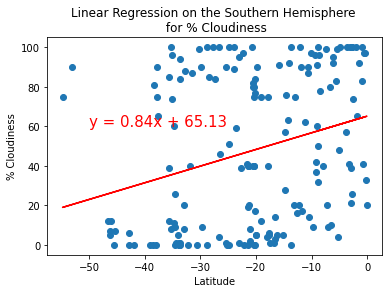

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,60))

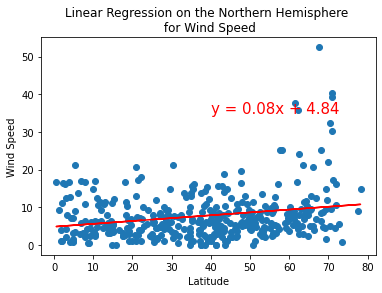

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(40,35))

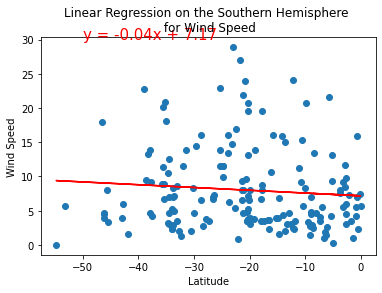

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-50,30))